# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [92]:
#DEFINICJA FUNKCJI POTRZEBNYCH DO ROZWIĄZANIA POWYŻSZEGO ZADANIA:

#FUNKCJA TWORZĄCA MACIERZ A ORAZ WEKTOR b
def spare_matrix_Abt(m: int,n: int):
    if type (m) is not int or type(n) is not int or m<0 or n<0:
      return None
    t = np.linspace(0,1,m)
    b = np.cos(4*t)
    A = np.vander(t,n)
    A = np.fliplr(A)
    return A,b

#FUNKCJA TWORZĄCA MACIERZ KWADRATOWĄ Z PROSTOKĄTNEJ
def square_from_rectan(A: np.ndarray, b: np.ndarray):
    if type(A) is not np.ndarray or type(b) is not np.ndarray:
      return None
    return np.transpose(A)@A, np.transpose(A)@b

#FUNKCJA OBLICZAJĄCA NORMĘ RESIDUUM
def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray):
    if type(A) is not np.ndarray and type(b) is not np.ndarray and type(x) is not np.ndarray:
        return None
    if  x.size != A.shape[1] or b.size != A.shape[0]:
        return None
    return np.linalg.norm(A@x-b)

#DEFINICJA POTRZENYCH PARAMETRÓW ORAZ MACIERZY
m = 50
n = 12
A, b = spare_matrix_Abt(m,n)


#ZADANIE 1.1.
A_T, b_T = square_from_rectan(A,b)
solution_1 = np.linalg.solve(A_T,b_T)

print("Rozwiązania, Zadanie 1.1.:")
i = 0
for el in solution_1:
    i=i+1
    print(f"x{i} = {el:.2f}")


#ZADANIE 1.2.
solution_2 = np.linalg.lstsq(A,b)[0]

print("\nRozwiązania, Zadanie 1.2.:")
i = 0
for el in solution_2:
    i=i+1
    print(f"x{i} = {el:.2f}")


#ZADANIE 1.3.
Q, R = np.linalg.qr(A)
solution_3 = sp.linalg.solve_triangular(R,np.transpose(Q)@b)

print("\nRozwiązania, Zadanie 1.3.:")
i = 0
for el in solution_3:
    i=i+1
    print(f"x{i} = {el:.2f}")


#ZADANIE 1.4.
U, s, Vh = np.linalg.svd(A)
# z wektora warości singularnych robimy macierz wart. singularnych
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[1], :A.shape[1]] = np.linalg.inv(np.diag(s))
y = Sigma.conj().transpose()@U.conj().transpose()@b
solution_4 = Vh.conj().transpose() @ y

print("\nRozwiązania, Zadanie 1.4.:")
i = 0
for el in solution_4:
    i=i+1
    print(f"x{i} = {el:.2f}")

Rozwiązania, Zadanie 1.1.:
x1 = 1.00
x2 = 0.00
x3 = -8.00
x4 = 0.00
x5 = 10.67
x6 = 0.00
x7 = -5.69
x8 = 0.01
x9 = 1.59
x10 = 0.08
x11 = -0.41
x12 = 0.09

Rozwiązania, Zadanie 1.2.:
x1 = 1.00
x2 = -0.00
x3 = -8.00
x4 = -0.00
x5 = 10.67
x6 = -0.01
x7 = -5.65
x8 = -0.08
x9 = 1.69
x10 = 0.01
x11 = -0.37
x12 = 0.09

Rozwiązania, Zadanie 1.3.:
x1 = 1.00
x2 = -0.00
x3 = -8.00
x4 = -0.00
x5 = 10.67
x6 = -0.01
x7 = -5.65
x8 = -0.08
x9 = 1.69
x10 = 0.01
x11 = -0.37
x12 = 0.09

Rozwiązania, Zadanie 1.4.:
x13 = 1.00
x14 = -0.00
x15 = -8.00
x16 = -0.00
x17 = 10.67
x18 = -0.01
x19 = -5.65
x20 = -0.08
x21 = 1.69
x22 = 0.01
x23 = -0.37
x24 = 0.09


In [124]:
#ZADANIE 1.5.
%load_ext memory_profiler

m=50
n=12

#DEFINIUJĘ FUNKCJE ZWIERAJĄCE LOGIKĘ DANYCH METOD
def func1_1():
    A, b = spare_matrix_Abt(m,n)
    A_T, b_T = square_from_rectan(A,b)
    solution_1 = np.linalg.solve(A_T,b_T)
    return solution_1

def func1_2():
    A, b = spare_matrix_Abt(m,n)
    solution_2 = np.linalg.lstsq(A,b)[0]
    return solution_2

def func1_3():
    A, b = spare_matrix_Abt(m,n)
    Q, R = np.linalg.qr(A)
    solution_3 = sp.linalg.solve_triangular(R,np.transpose(Q)@b)
    return solution_3

def func1_4():
    A, b = spare_matrix_Abt(m,n)
    U, s, Vh = np.linalg.svd(A)
    # z wektora warości singularnych robimy macierz wart. singularnych
    Sigma = np.zeros((A.shape[0], A.shape[1]))
    Sigma[:A.shape[1], :A.shape[1]] = np.linalg.inv(np.diag(s))
    y = Sigma.conj().transpose()@U.conj().transpose()@b
    solution_4 = Vh.conj().transpose() @ y
    return solution_4

def time_check(func):
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func()
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func()
    print('\n')


print("\nZadanie 1.1.")
time_check(func1_1)
print("\nZadanie 1.2.")
time_check(func1_2)
print("\nZadanie 1.3.")
time_check(func1_3)
print("\nZadanie 1.4.")
time_check(func1_4)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler

Zadanie 1.1.
Timing: 
62.9 µs ± 5.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 195.24 MiB, increment: 0.00 MiB



Zadanie 1.2.
Timing: 
99.6 µs ± 10.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 195.25 MiB, increment: 0.00 MiB



Zadanie 1.3.
Timing: 
121 µs ± 9.69 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 195.25 MiB, increment: 0.00 MiB



Zadanie 1.4.
Timing: 
128 µs ± 11.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 195.25 MiB, increment: 0.00 MiB




In [126]:
#Zadanie 1.6.
A, b = spare_matrix_Abt(50,12)

print("\n\nNorma residuum dla Zadania 1.1.:\n", residual_norm(A, func1_1(), b))


print("\n\nNorma residuum dla Zadania 1.2.:\n", residual_norm(A, func1_2(), b))


print("\n\nNorma residuum dla Zadania 1.3.:\n", residual_norm(A, func1_3(), b))


print("\n\nNorma residuum dla Zadania 1.4.:\n", residual_norm(A, func1_4(), b))



Norma residuum dla Zadania 1.1.:
 1.572524215798008e-08


Norma residuum dla Zadania 1.2.:
 7.999154808445583e-09


Norma residuum dla Zadania 1.3.:
 7.999154160423369e-09


Norma residuum dla Zadania 1.4.:
 7.999154179371797e-09


WNIOSKI: PIERWSZA STOSOWANA PRZEZ NAS METODA (W ZADANIU 1.1.) JEST NAJSZYBSZA, ALE TAKŻE NAJMNIEJ DOKŁADNA. WSZYSTKIE KOLEJNE METODY MAJĄ BARDZO PODOBNĄ DOKŁADNOŚĆ, JEDNAK ICH ZŁOŻONOŚĆ OBLICZENIOWA ROŚNIE. W TAKIM WYPADKU, NAJLEPSZYM WYBOREM JEST SKORZYSTANIE Z METODY Z ZADANIA 1.2. CZYLI Z WBUDOWANEJ FUNKCJI JĘZYKA PYTHON: np.linalg.lstsq(A,b) 

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.


2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

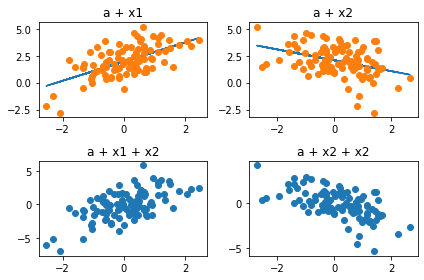

In [4]:
#ZADANIE 2.1.
x1 = np.random.normal(0,1,(100,1))
x2 = np.random.normal(0,1,(100,1))

#ZADANIE 2.2. 
e = np.random.normal(0,1,(100,1))
y = 2 + x1 - 0.5*x2 + e

#ZADANIE 2.3.
ones = np.ones((100,1))

X1 = np.concatenate((x1,ones),axis = 1)
X2 = np.concatenate((x2,ones),axis = 1)
X3 = np.concatenate((x1,x2,ones),axis = 1)

#ZADANIE 2.4.
Q1, R1 = np.linalg.qr(X1)
A1 = sp.linalg.solve_triangular(R1,np.transpose(Q1)@y)

Q2, R2 = np.linalg.qr(X2)
A2 = sp.linalg.solve_triangular(R2,np.transpose(Q2)@y)

Q3, R3 = np.linalg.qr(X3)
A3 = sp.linalg.solve_triangular(R3,np.transpose(Q3)@y)

#ZADANIE 2.5.
y_approx1 =  A1[0]*x1 + A1[1]
y_approx2 = A2[1] + A2[0]*x2
y_approx3 = A3[2] + A3[1]*x1 + A3[0]*x2
y_approx4 = A3[2] + A3[0]*x2 + A3[1]*x2

fig, axs = plt.subplots(2,2)
axs[0,0].plot(x1,y_approx1,x1,y,'o')
axs[0,0].set(title="a + x1")
axs[0,1].plot(x2,y_approx2,x2,y,'o')
axs[0,1].set(title="a + x2")
axs[1,0].plot(x1,y-y_approx3,'o')
axs[1,0].set(title="a + x1 + x2")
axs[1,1].plot(x2,y-y_approx4,'o')
axs[1,1].set(title="a + x2 + x2")

plt.tight_layout()

In [5]:
pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)